## Importing Libraries




In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

## Preprocessing


In [68]:
# open the datasets :
df = pd.read_csv("../data_file.csv")
# delete the useless columns :
cols_to_drop = ['FileName','md5Hash']
df = df.drop(columns=cols_to_drop)

In [69]:
# Handle missing values 
df = df.dropna()

In [70]:
# replace the value repeated : MD5HASH - DebugSize - MajorOSVersion - BitcoinAddresses - NumberOfSections - SizeOfStackReserve
columns = ["Machine", "DebugSize", "NumberOfSections", "SizeOfStackReserve","MajorOSVersion", "BitcoinAddresses"]
for col in columns:
    df[col] = df[col].astype('category')
    df[col] = df[col].cat.codes
    
# delete all the duplicated rows :
df.drop_duplicates(keep='last')

,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
1,4,11,121728,10,10,126576,4930,0,14,10,7,9,16864,1024,0,1
3,4,11,19904,10,10,21312,252,18160,14,10,5,9,16736,1040,0,1
4,4,11,97728,10,10,105792,1852,70592,14,10,6,9,16736,1096,0,1
5,4,11,319776,10,10,374944,9208,312608,14,10,6,9,16736,2072,0,1
7,4,11,197888,10,10,229024,112,187208,14,10,6,9,16736,1328,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62480,1,0,0,1,4,0,0,4096,6,0,2,12,0,23504,0,0
62481,1,0,0,7,10,0,0,0,7,0,6,12,0,15704,0,0
62482,1,0,0,0,4,0,0,404908,2,50,10,12,0,2364,0,0
62483,1,0,0,0,4,14448,70,4096,8,0,3,12,0,130296,0,0


In [71]:
# Normalize/Standardize feature
scaler = StandardScaler()
X = df.iloc[:, 1:-1].values
X = scaler.fit_transform(X)

# Extract target
Y = df.iloc[:, -1].values
# save the new datasets into new csv file :
df.to_csv("df_clear.csv")

## Visualize Distributions

 Histograms

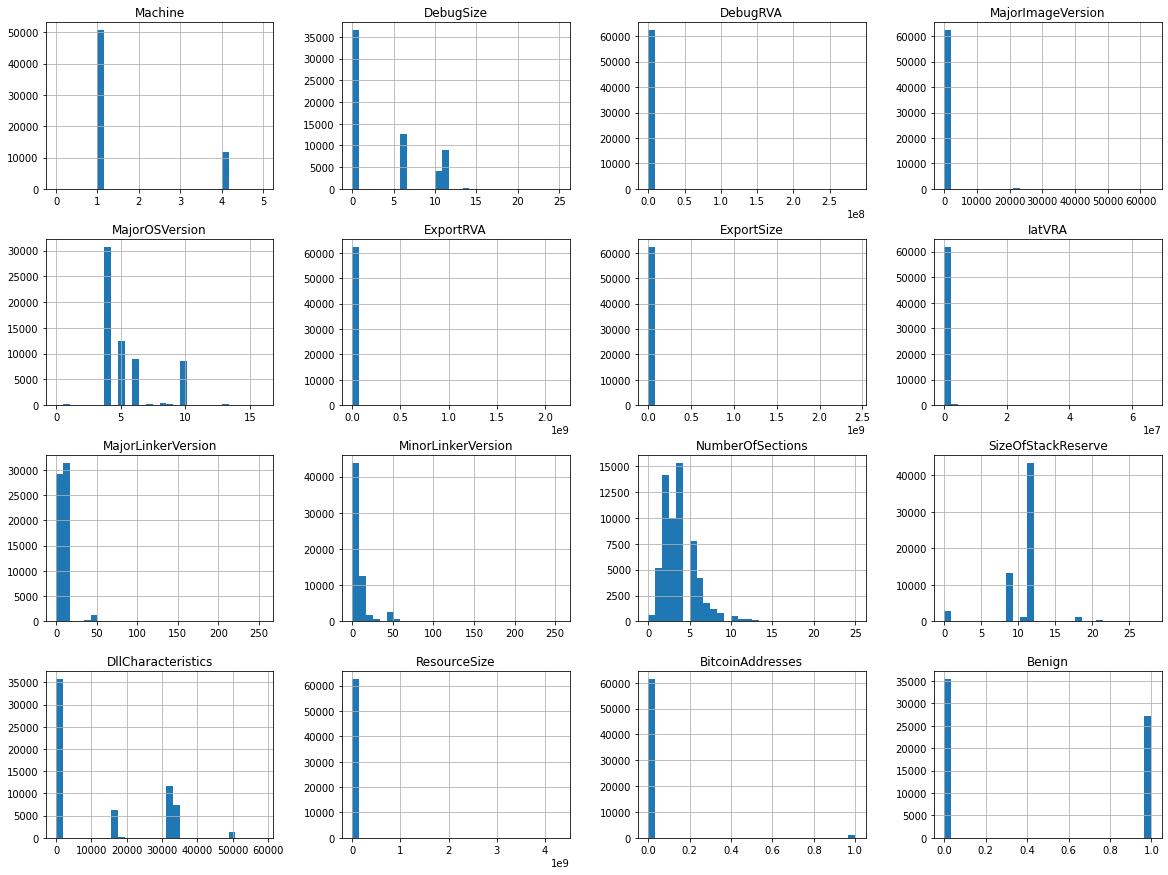

In [72]:
# To understand the distribution of each feature.
import matplotlib.pyplot as plt

df.hist(bins=30, figsize=(20, 15))
plt.show()


### Prepare dataset after preprocessing

In [73]:
df = pd.read_csv("df_clear.csv")
df.head()

,Unnamed: 0,Machine,DebugSize,DebugRVA,MajorImageVersion,MajorOSVersion,ExportRVA,ExportSize,IatVRA,MajorLinkerVersion,MinorLinkerVersion,NumberOfSections,SizeOfStackReserve,DllCharacteristics,ResourceSize,BitcoinAddresses,Benign
0,0,1,0,0,0,4,0,0,8192,8,0,2,12,34112,672,0,1
1,1,4,11,121728,10,10,126576,4930,0,14,10,7,9,16864,1024,0,1
2,2,1,0,0,0,4,0,0,8192,8,0,2,12,34112,672,0,1
3,3,4,11,19904,10,10,21312,252,18160,14,10,5,9,16736,1040,0,1
4,4,4,11,97728,10,10,105792,1852,70592,14,10,6,9,16736,1096,0,1


In [74]:
# dataframe informations
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62485 entries, 0 to 62484
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Unnamed: 0          62485 non-null  int64
 1   Machine             62485 non-null  int64
 2   DebugSize           62485 non-null  int64
 3   DebugRVA            62485 non-null  int64
 4   MajorImageVersion   62485 non-null  int64
 5   MajorOSVersion      62485 non-null  int64
 6   ExportRVA           62485 non-null  int64
 7   ExportSize          62485 non-null  int64
 8   IatVRA              62485 non-null  int64
 9   MajorLinkerVersion  62485 non-null  int64
 10  MinorLinkerVersion  62485 non-null  int64
 11  NumberOfSections    62485 non-null  int64
 12  SizeOfStackReserve  62485 non-null  int64
 13  DllCharacteristics  62485 non-null  int64
 14  ResourceSize        62485 non-null  int64
 15  BitcoinAddresses    62485 non-null  int64
 16  Benign              62485 non-null  int6

In [75]:
# Transoform into List :
X = df.iloc[:, 1:-1].values
Y = df.iloc[:,-1].values

In [76]:
print("The features (Machine ... Bitcoin@) : ")
X

The features (Machine ... Bitcoin@) : 


array([[     1,      0,      0, ...,  34112,    672,      0],
       [     4,     11, 121728, ...,  16864,   1024,      0],
       [     1,      0,      0, ...,  34112,    672,      0],
       ...,
       [     1,      0,      0, ...,      0,   2364,      0],
       [     1,      0,      0, ...,      0, 130296,      0],
       [     1,      0,      0, ...,      0,   6912,      0]], dtype=int64)

In [77]:
print("Target vecteur (Benign) : ")
Y

Target vecteur (Benign) : 


array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

#### Random Forest Classifier

In [78]:
# Generate random classification data
X, y = make_classification(n_samples=1000, n_features=15, n_classes=2,random_state=0)

# Split data into training and testing sets
# 20% testing and 80% train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# random state if we split for plusieur fois, ca ne sera pas changer :
# 80% of 1 and 20% if re-split maysrach lakhlate

# Create a Random Forest Classifier with 100 trees
rf = RandomForestClassifier(n_estimators=100,random_state=0)

# Fit the Random Forest Classifier to the training data
rf.fit(X_train, y_train)

# Predict the classes of the testing set
y_pred = rf.predict(X_test)

# Print the accuracy of the model
print("Accuracy:", rf.score(X_test, y_test))

Accuracy: 0.97


#### Add a new to test and see the results


In [79]:
# Load new data for prediction
X_new = [[1, 1, 0, 0, 6, 2, 0, 8192, 8, 0, 3, 1048576, 34112, 672,0],[3, 0,	0, 0, 6, 2,	0, 8192, 8,	0, 0, 0, 0, 672,0 ]]

# Use the model to predict the classes of the new data
y_pred = rf.predict(X_new)

# Print the predicted classes of the new data
print("Predicted classes:", y_pred)

Predicted classes: [1 1]


#### Evaluate its performance using different metrics

In [80]:
# Use the model to predict the classes of the testing set
y_pred = rf.predict(X_test)

# Print the confusion matrix and classification report
print("Confusion Matrix:")
cm=confusion_matrix(y_test, y_pred)
print(cm)

print("\n Classification Report:")
print(classification_report(y_test, y_pred))


Confusion Matrix:
[[95  3]
 [ 3 99]]

 Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        98
           1       0.97      0.97      0.97       102

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



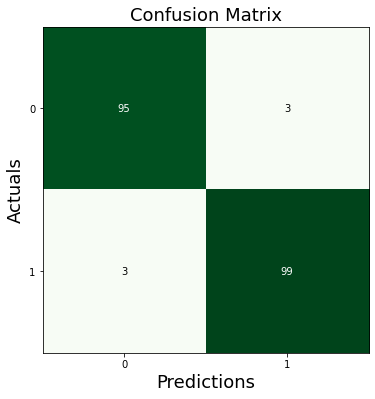

In [81]:
fig, ax = plot_confusion_matrix(conf_mat=cm , figsize=(6, 6), cmap=plt.cm.Greens)
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()



#### Cross-validation 

In [82]:
# Calculate cross-validation scores for the model
# cross-validation scores for a model : a way of evaluating the performance of the model on a given dataset.
scores = cross_val_score(rf, X, y, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", scores)

# Mean score refers to the average score obtained from a set of scores. (moyenne)
print("Mean Score:", scores.mean())

Cross-Validation Scores: [0.99  0.96  0.935 0.95  0.96 ]
Mean Score: 0.959


In [83]:
# Fit the classifier to the data
rf.fit(X, y)


RandomForestClassifier(random_state=0)

### Tune Hyperparameters

In [84]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150}
Best Score: 0.95875


Validate the Model

In [85]:
from sklearn.model_selection import cross_val_score

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Perform cross-validation
cv_scores = cross_val_score(best_model, X, y, cv=5)

# Print cross-validation scores and mean score
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", cv_scores.mean())


Cross-Validation Scores: [0.985 0.96  0.94  0.95  0.96 ]
Mean Cross-Validation Score: 0.959


In [86]:
# Evaluate the final model on the test set
final_model = grid_search.best_estimator_
test_score = final_model.score(X_test, y_test)

# Print the test score
print("Test Set Score:", test_score)


Test Set Score: 0.97


#### Save the model

In [87]:
import pickle

# Save the model
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf, file)
